# Validation of the PYNQ-Z2 Inference of the ETX4VELO MLP from PyTorch

From the [hls4ml-tutorial](https://github.com/fastmachinelearning/hls4ml-tutorial).

We executed NN inference on the pynq-z2! Now we can copy the `y_hw.npy` back to the host we've been using for the training and synthesis, and make a final plot to check that the output we took on the board is as expected.

The command to copy it back is

```bash
scp xilinx@192.168.2.99:~/jupyter_notebooks/y_hw.npy $MODEL_DIR
```

## Setup

In [1]:
import sys
import re
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("..") # plotting.py
import plotting

%matplotlib inline
from sklearn.metrics import accuracy_score

In [2]:
# TO MODIFY

board = "pynq-z2" # "alveo-u250" or "pynq-z2"
precision = None # None for default, otherwise ap_fixed<a,b> e.g. <8,5>
backend = "VivadoAccelerator"

model_dir = "/dsk/l1/misc/fgias/torch-mlp"
prj_dir = "hls4ml_prj"

In [3]:
if precision is not None:
    # Regular expression to match the first number
    match = re.findall(r'\d+', precision)[0]
    model_dir += "-" + match + "bit"

model_dir += "-" + board
prj_dir += "_" + board

## Validation

In [4]:
y_hw = np.load(model_dir+'/y_hw.npy')
y_hls = np.load(model_dir+'/y_hls.npy')

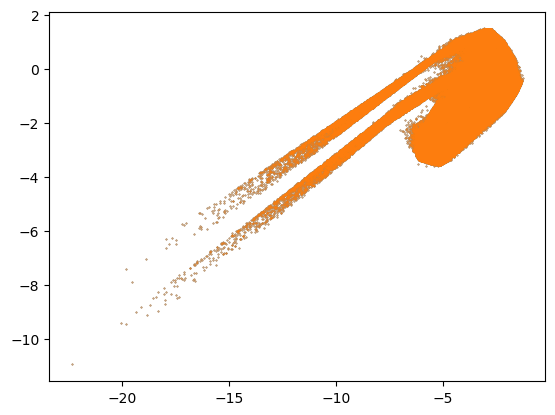

In [5]:
plt.scatter(y_hw[:,0], y_hw[:,1], s=0.1)
plt.scatter(y_hls[:,0], y_hls[:,1], s=0.1)
plt.show()


In [6]:
np.all(y_hls==y_hw)

True

In [7]:
y_hls

array([[-3.74902344, -0.87402344,  3.59082031],
       [-4.78320312, -1.76953125,  0.85449219],
       [-5.16015625, -1.95800781,  0.88964844],
       ...,
       [-2.76269531,  1.27734375,  2.06347656],
       [-6.83007812, -0.51171875,  0.94140625],
       [-6.56933594, -0.31152344,  1.63867188]])

In [8]:
y_hw

array([[-3.7490234 , -0.87402344,  3.5908203 ],
       [-4.783203  , -1.7695312 ,  0.8544922 ],
       [-5.1601562 , -1.9580078 ,  0.88964844],
       ...,
       [-2.7626953 ,  1.2773438 ,  2.0634766 ],
       [-6.830078  , -0.51171875,  0.94140625],
       [-6.569336  , -0.31152344,  1.6386719 ]], dtype=float32)

The HLS simulation is matching the hardware inference.